# 大鹏一日同风起，扶摇直上九万里
龙头战法：每日分析涨停板股票，找出趋势龙头，吃大肉。

In [18]:
import akshare as ak
import pandas as pd
from datetime import datetime, timedelta
import mplfinance as mpf
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [19]:
# 设置中文字体
font_path = '/System/Library/Fonts/Supplemental/Songti.ttc'
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

In [20]:
# 使用 akshare 获取当日涨停板股票
try:
    # 使用 akshare 的 stock_zt_pool_em 函数获取涨停板股票数据
    bull_stock = ak.stock_zt_pool_em(date=datetime.now().strftime("%Y%m%d"))
    if bull_stock.empty:
        print("今日没有涨停板股票")
    else:
        # 确保列名正确
        expected_columns = ['代码', '名称', '涨跌幅', '最新价', '成交额', '流通市值', '总市值', '换手率', '封板资金', '首次封板时间', '最后封板时间', '炸板次数', '涨停统计', '连板数', '所属行业']
        bull_stock = bull_stock.reindex(columns=expected_columns)
        print(f"今日共有 {len(bull_stock)} 只涨停板股票")
except Exception as e:
    print(f"获取涨停板股票数据时出错: {str(e)}")
    bull_stock = pd.DataFrame()

bull_stock

今日共有 94 只涨停板股票


,代码,名称,涨跌幅,最新价,成交额,流通市值,总市值,换手率,封板资金,首次封板时间,最后封板时间,炸板次数,涨停统计,连板数,所属行业
0,000859,国风新材,10.101010,4.36,51861960,3.905924e+09,3.906457e+09,1.327777,57978909,092500,092500,0,1/1,1,塑料制品
1,002628,成都路桥,10.163935,3.36,36741600,2.536898e+09,2.543857e+09,1.448288,470853936,092500,092500,0,3/3,3,工程建设
2,300489,光智科技,19.993904,39.37,44539281,5.400144e+09,5.420180e+09,0.824780,1122525314,092500,092500,0,3/3,3,有色金属
3,603038,华立股份,10.000000,12.10,71578833,3.250993e+09,3.250993e+09,2.201753,237622147,092501,092501,0,4/4,4,装修装饰
4,600520,文一科技,10.020877,26.35,97281829,4.174630e+09,4.174630e+09,2.330310,607551686,092502,092502,0,2/2,1,专用设备
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,002305,南国置业,10.106383,2.07,375238544,3.589594e+09,3.589827e+09,10.895470,23706468,145033,145033,0,1/1,1,房地产开
90,300540,蜀道装备,19.991232,27.37,631184688,3.972234e+09,4.526341e+09,16.667217,69980847,145403,145403,0,1/1,1,专用设备
91,600383,金地集团,10.055866,5.91,2387525408,2.668119e+10,2.668119e+10,9.183414,21882957,145536,145536,0,1/1,1,房地产开
92,603389,亚振家居,10.000000,7.81,229189340,2.052093e+09,2.052093e+09,11.777308,6207231,145623,145623,0,1/1,1,装修建材


In [21]:
# 只保留主板的标的，去除其他板块的标的
main_board_stocks = bull_stock[
    ~(
        bull_stock['代码'].str.startswith(('300', '301', '688', '8'))  # 去除创业板、科创板、北交所
        | bull_stock['名称'].str.contains('ST')  # 去除ST股票
        | bull_stock['名称'].str.contains('退市')  # 去除退市股票
        | bull_stock['名称'].str.contains('退')  # 去除退市股票
    )
]

print(f"筛选后的主板涨停股票数量: {len(main_board_stocks)}")
main_board_stocks


筛选后的主板涨停股票数量: 74


,代码,名称,涨跌幅,最新价,成交额,流通市值,总市值,换手率,封板资金,首次封板时间,最后封板时间,炸板次数,涨停统计,连板数,所属行业
0,000859,国风新材,10.101010,4.36,51861960,3.905924e+09,3.906457e+09,1.327777,57978909,092500,092500,0,1/1,1,塑料制品
1,002628,成都路桥,10.163935,3.36,36741600,2.536898e+09,2.543857e+09,1.448288,470853936,092500,092500,0,3/3,3,工程建设
3,603038,华立股份,10.000000,12.10,71578833,3.250993e+09,3.250993e+09,2.201753,237622147,092501,092501,0,4/4,4,装修装饰
4,600520,文一科技,10.020877,26.35,97281829,4.174630e+09,4.174630e+09,2.330310,607551686,092502,092502,0,2/2,1,专用设备
5,600939,重庆建工,10.000000,3.41,55611511,6.485114e+09,6.485114e+09,0.857526,157899841,092503,092503,0,3/3,3,工程建设
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,600336,澳柯玛,9.985935,7.82,802188032,6.240475e+09,6.240475e+09,13.543235,52036610,145006,145006,0,1/1,1,家电行业
89,002305,南国置业,10.106383,2.07,375238544,3.589594e+09,3.589827e+09,10.895470,23706468,145033,145033,0,1/1,1,房地产开
91,600383,金地集团,10.055866,5.91,2387525408,2.668119e+10,2.668119e+10,9.183414,21882957,145536,145536,0,1/1,1,房地产开
92,603389,亚振家居,10.000000,7.81,229189340,2.052093e+09,2.052093e+09,11.777308,6207231,145623,145623,0,1/1,1,装修建材


In [22]:
# 选择市值大于 100 亿的公司
large_cap_stocks = main_board_stocks[main_board_stocks['流通市值'] > 100e8]  # 100亿 = 100 * 10^8

print(f"市值大于100亿的涨停股票数量: {len(large_cap_stocks)}")
large_cap_stocks


市值大于100亿的涨停股票数量: 18


,代码,名称,涨跌幅,最新价,成交额,流通市值,总市值,换手率,封板资金,首次封板时间,最后封板时间,炸板次数,涨停统计,连板数,所属行业
12,600039,四川路桥,9.946950,8.29,1584254704,5.554372e+10,7.222926e+10,2.882759,193290924,093125,103413,7,1/1,1,工程建设
13,000628,高新发展,9.996651,65.69,5665305600,1.261802e+10,2.314127e+10,45.889290,92576917,093300,144906,4,8/5,3,工程建设
15,601107,四川成渝,9.940357,5.53,595413216,1.195995e+10,1.691107e+10,5.049229,100963897,093538,100802,2,1/1,1,铁路公路
27,600641,万业企业,10.000000,15.95,1405655520,1.484355e+10,1.484355e+10,9.595963,7592614,094809,144948,2,1/1,1,房地产开
31,000935,四川双马,9.993674,17.39,424139568,1.327623e+10,1.327623e+10,3.255483,73043008,095221,095221,0,3/2,1,水泥建材
33,601005,重庆钢铁,10.400001,1.38,400475456,1.156506e+10,1.230767e+10,3.542475,82915960,095400,101935,3,1/1,1,钢铁行业
34,000402,金 融 街,10.158731,3.47,721878512,1.036916e+10,1.037159e+10,7.074154,29172348,095418,141136,7,11/6,1,房地产开
36,000158,常山北明,10.004764,23.09,8851213568,3.666274e+10,3.691206e+10,24.749432,672673119,095512,103512,2,20/11,1,综合行业
40,002926,华西证券,10.012674,8.68,1485604624,2.278500e+10,2.278500e+10,6.608454,63439950,095803,142542,5,1/1,1,证券
49,002302,西部建设,9.986505,8.15,844392352,1.028819e+10,1.028819e+10,8.459521,110514521,104118,104118,0,5/3,1,水泥建材


In [23]:
# 按照首次封板时间排序
sorted_stocks = large_cap_stocks.sort_values(by='首次封板时间')

print("按首次封板时间排序后的股票：")
print(sorted_stocks[['代码', '名称', '首次封板时间', '最后封板时间', '涨停统计', '连板数', '所属行业']])


按首次封板时间排序后的股票：
        代码     名称  首次封板时间  最后封板时间   涨停统计  连板数  所属行业
12  600039   四川路桥  093125  103413    1/1    1  工程建设
13  000628   高新发展  093300  144906    8/5    3  工程建设
15  601107   四川成渝  093538  100802    1/1    1  铁路公路
27  600641   万业企业  094809  144948    1/1    1  房地产开
31  000935   四川双马  095221  095221    3/2    1  水泥建材
33  601005   重庆钢铁  095400  101935    1/1    1  钢铁行业
34  000402  金 融 街  095418  141136   11/6    1  房地产开
36  000158   常山北明  095512  103512  20/11    1  综合行业
40  002926   华西证券  095803  142542    1/1    1    证券
49  002302   西部建设  104118  104118    5/3    1  水泥建材
52  600657   信达地产  105110  112252   10/6    3  房地产开
53  600606   绿地控股  105136  143412   10/5    1  房地产开
55  000801   四川九洲  105621  105621    3/2    1  家电行业
62  002583    海能达  130100  132727  15/12    2  通信设备
72  000062   深圳华强  133312  133312    1/1    1  电子元件
76  600839   四川长虹  140623  140623    1/1    1  家电行业
77  000810   创维数字  141545  145654    1/1    1  通信设备
91  600383   金地集团  145536  145536    1/1    1  房地

In [39]:
def plot_stock(stock_code, stock_name, start_date, end_date, save_image=False):
    # 获取股票数据
    stock_df = ak.stock_zh_a_hist(symbol=stock_code, start_date=start_date, end_date=end_date, adjust="qfq")
    
    # 设置索引
    stock_df.index = pd.to_datetime(stock_df['日期'])
    stock_df = stock_df[['开盘', '最高', '最低', '收盘', '成交量']]
    stock_df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    
    # 计算MACD
    exp1 = stock_df['Close'].ewm(span=12, adjust=False).mean()
    exp2 = stock_df['Close'].ewm(span=26, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=9, adjust=False).mean()
    histogram = macd - signal
    
    # 添加MACD数据到DataFrame
    stock_df['MACD'] = macd
    stock_df['Signal'] = signal
    stock_df['Histogram'] = histogram

    # 设置图表样式
    mc = mpf.make_marketcolors(up='red', down='green', inherit=True)
    s = mpf.make_mpf_style(marketcolors=mc)

    # 添加均线和MACD指标
    add_plot = [
        mpf.make_addplot(stock_df[['MACD', 'Signal']], panel=2, type='line'),
        mpf.make_addplot(stock_df['Histogram'], panel=2, type='bar', color='dimgray'),
        mpf.make_addplot(stock_df['Close'].rolling(window=5).mean(), color='blue'),
        mpf.make_addplot(stock_df['Close'].rolling(window=13).mean(), color='orange'),
        mpf.make_addplot(stock_df['Close'].rolling(window=20).mean(), color='green'),
    ]

    # 绘制图表
    fig, axs = mpf.plot(stock_df, type='candle', style=s,
             volume=True, volume_panel=1, panel_ratios=(2,1,1),
             addplot=add_plot, figsize=(12,8), returnfig=True)
    
    # Get the main price axes
    ax_main = axs[0]
    
    # Add moving average lines to the legend
    ax_main.plot([], [], color='blue', label='MA5')
    ax_main.plot([], [], color='orange', label='MA13')
    ax_main.plot([], [], color='green', label='MA20')
    # 设置标题字体
    ax_main.set_title(f'{stock_name}({stock_code}) 股票价格', fontproperties=font_prop)
    
    # 添加均线图例
    ax_main.legend(loc='upper left', prop=font_prop)

        # 如果需要保存图片
    if save_image:
        plt.savefig(f'{stock_code}_{stock_name}.png', dpi=300, bbox_inches='tight')


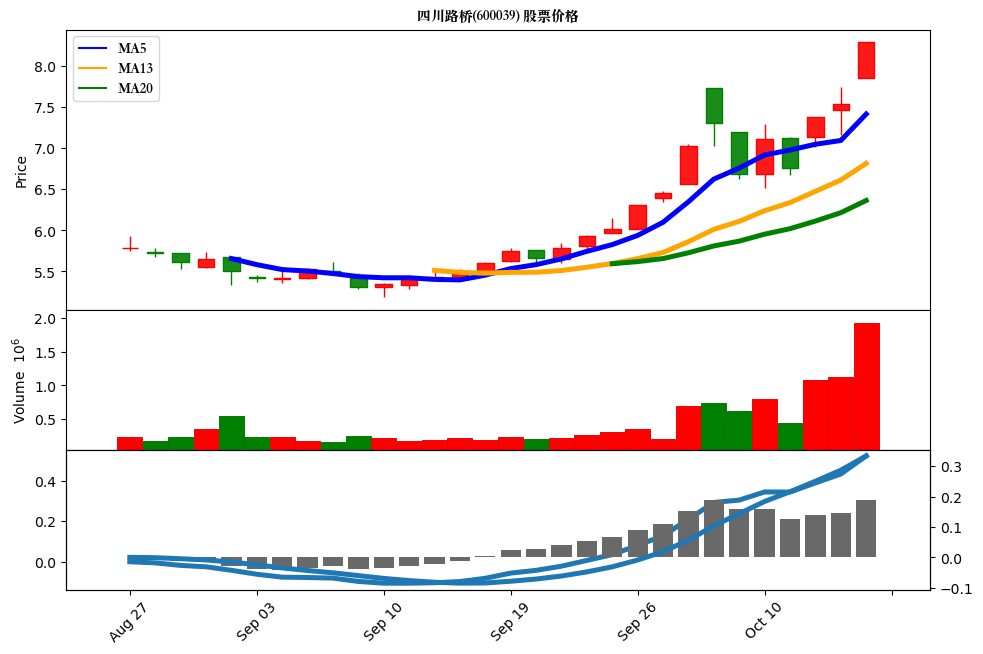

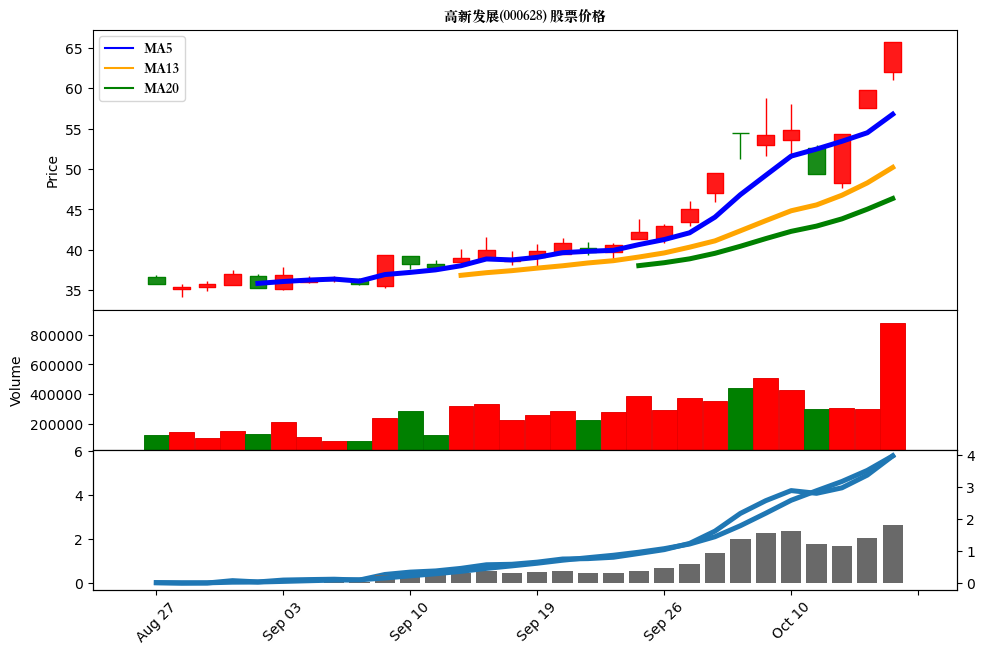

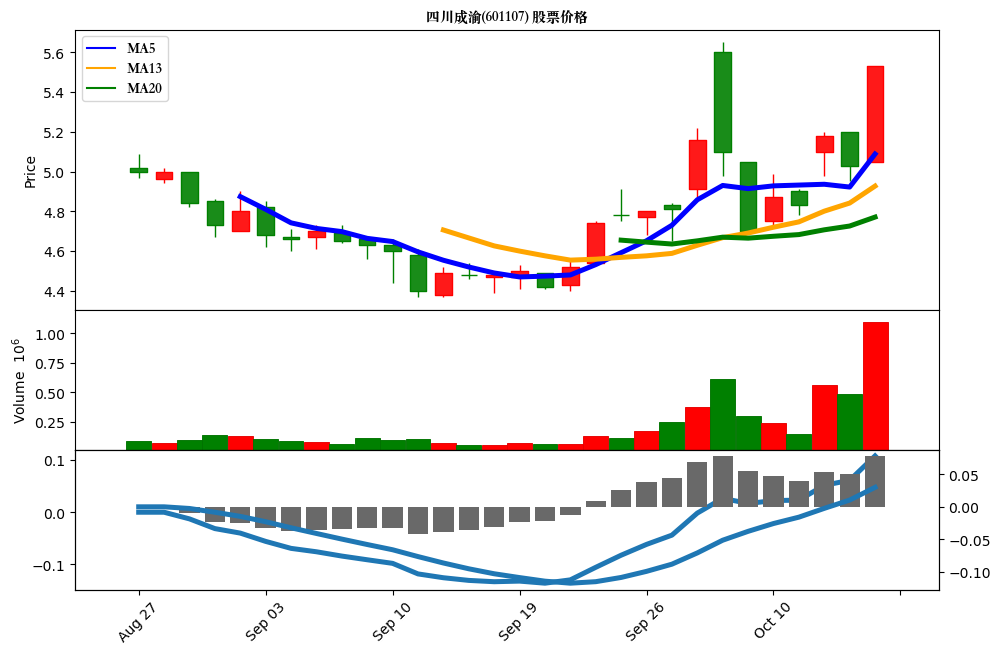

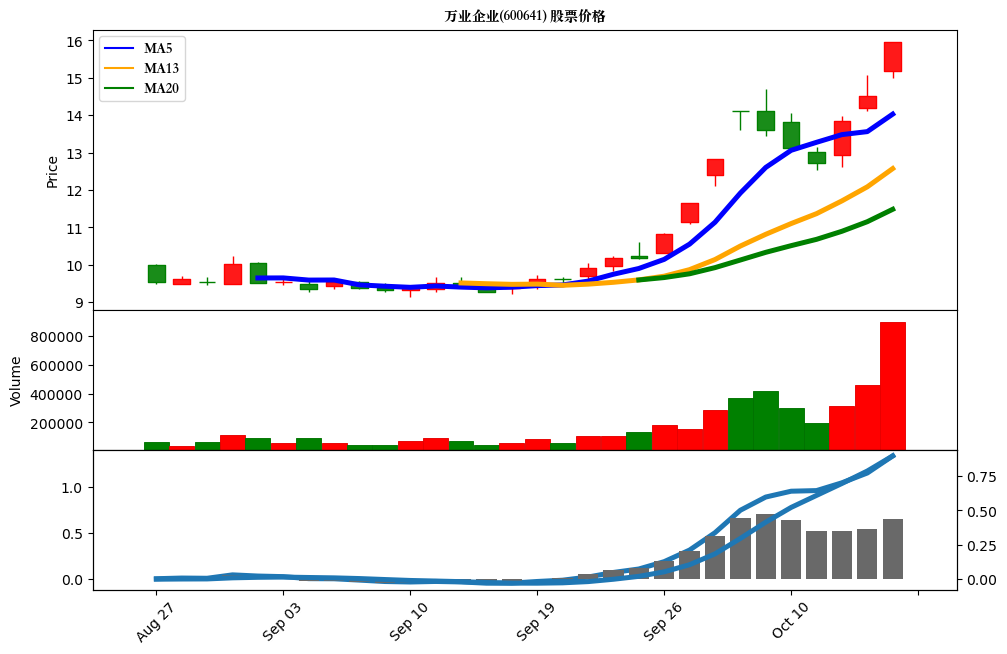

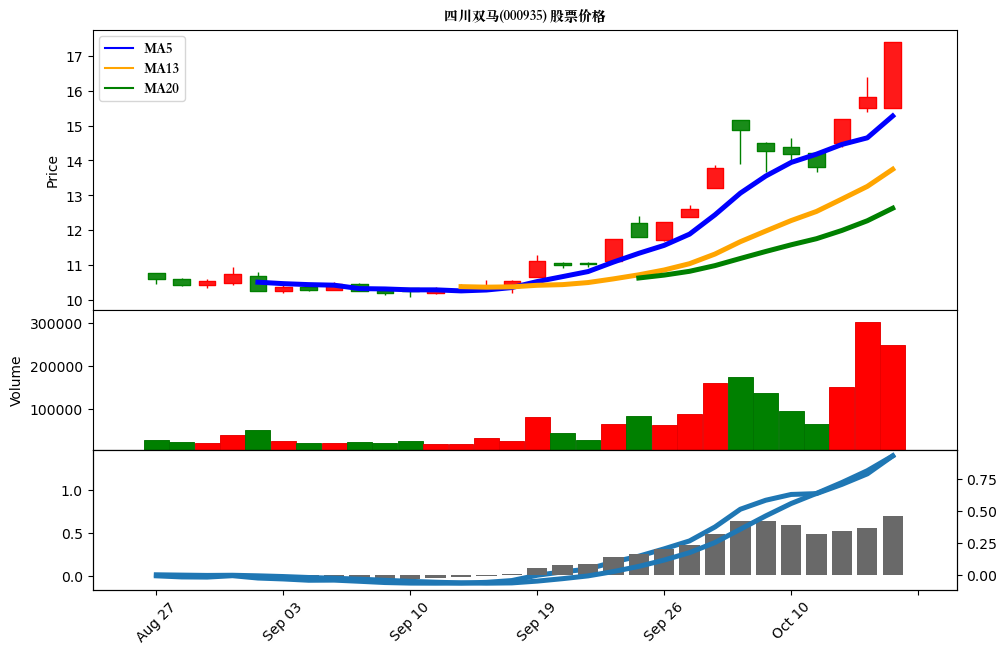

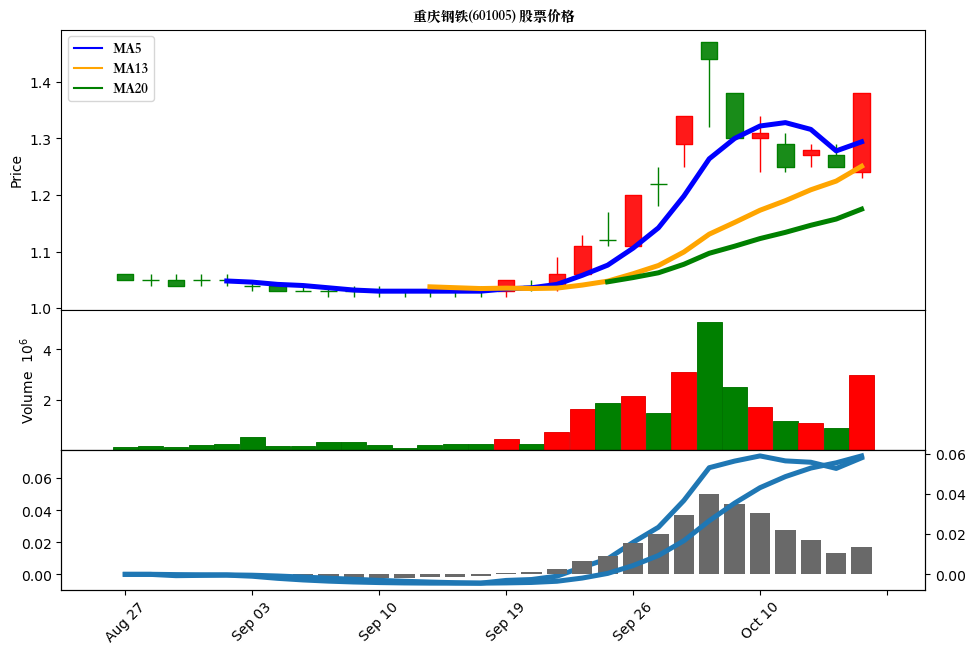

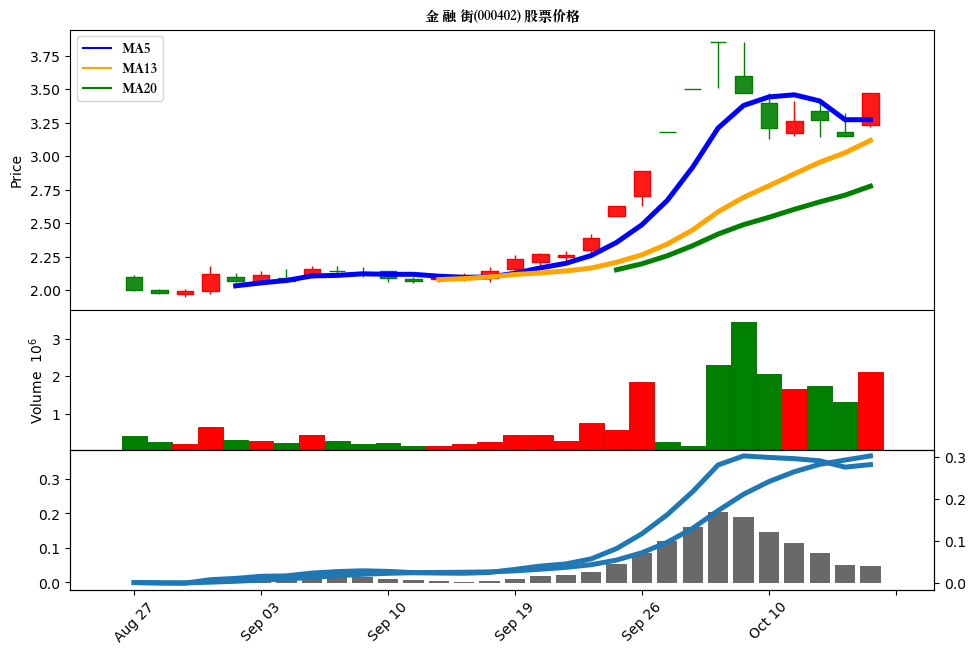

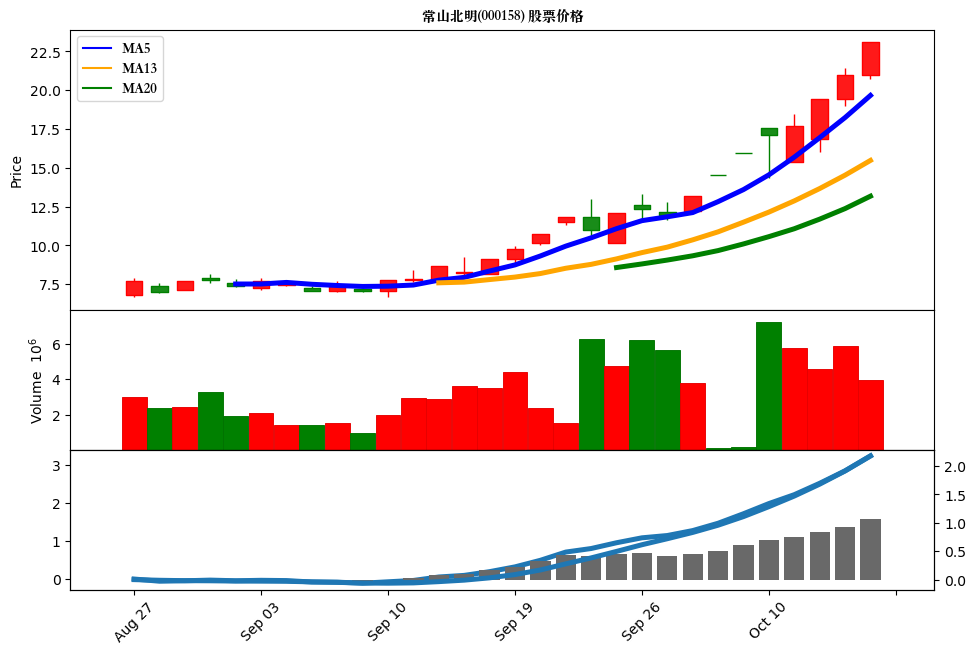

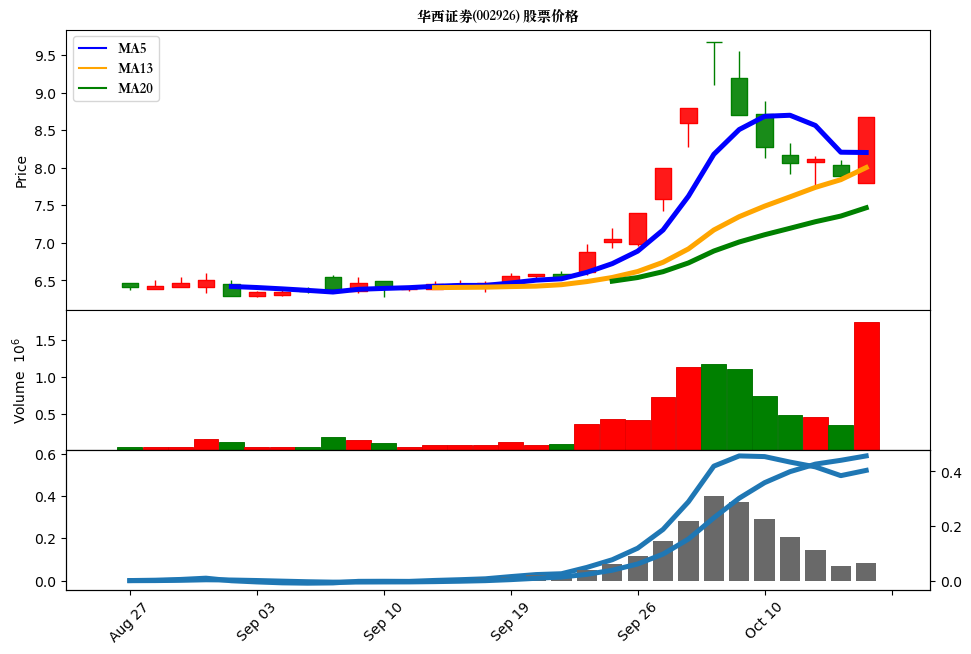

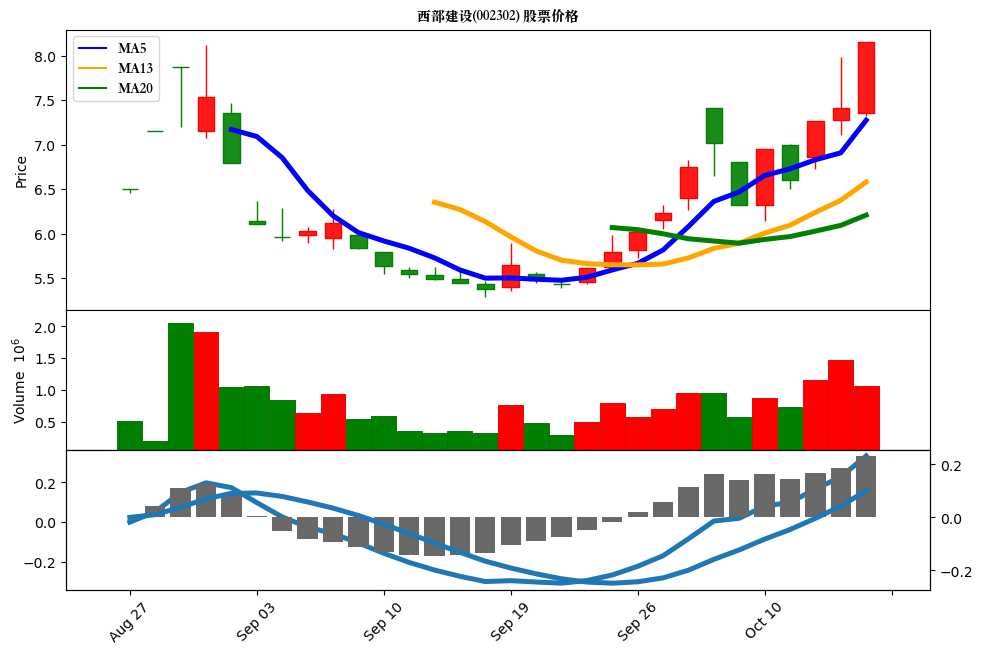

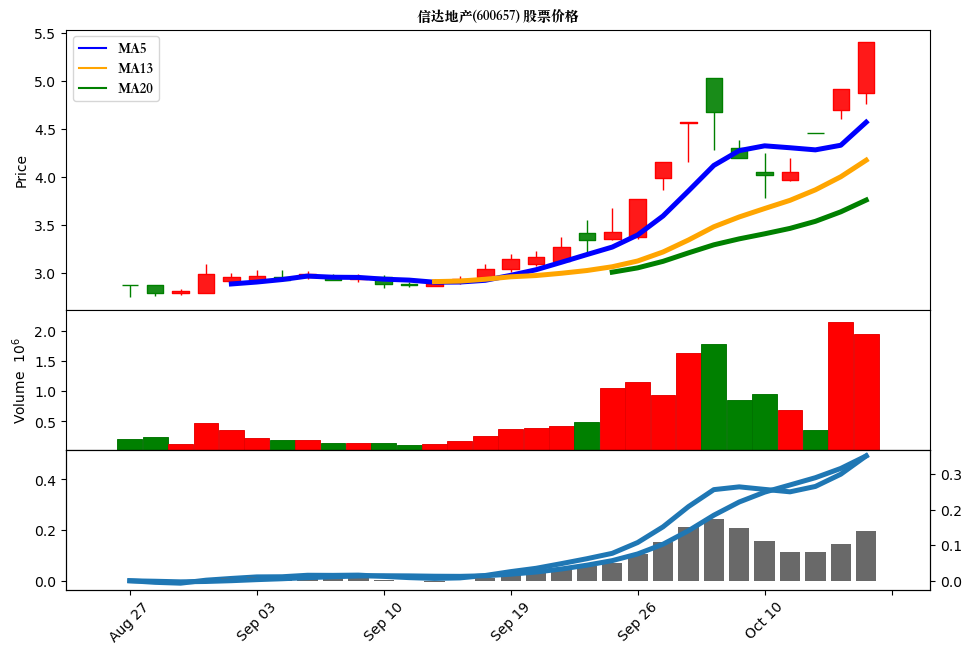

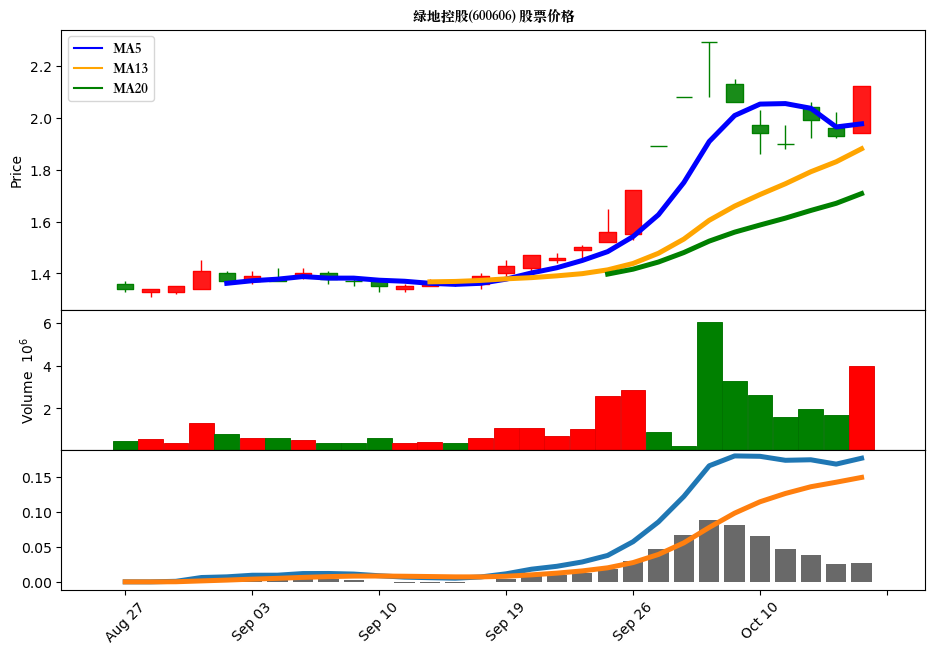

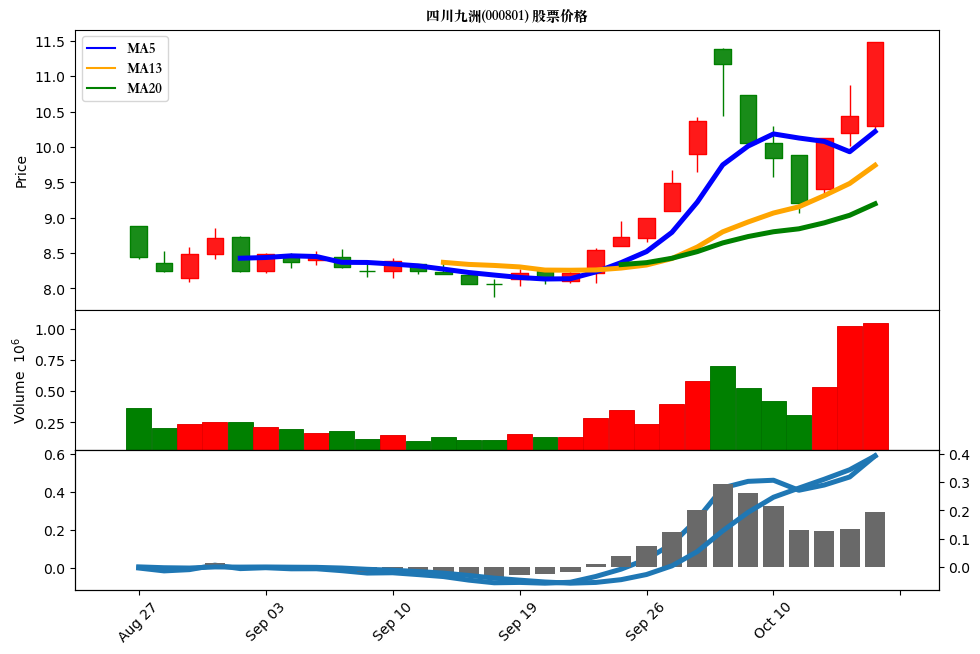

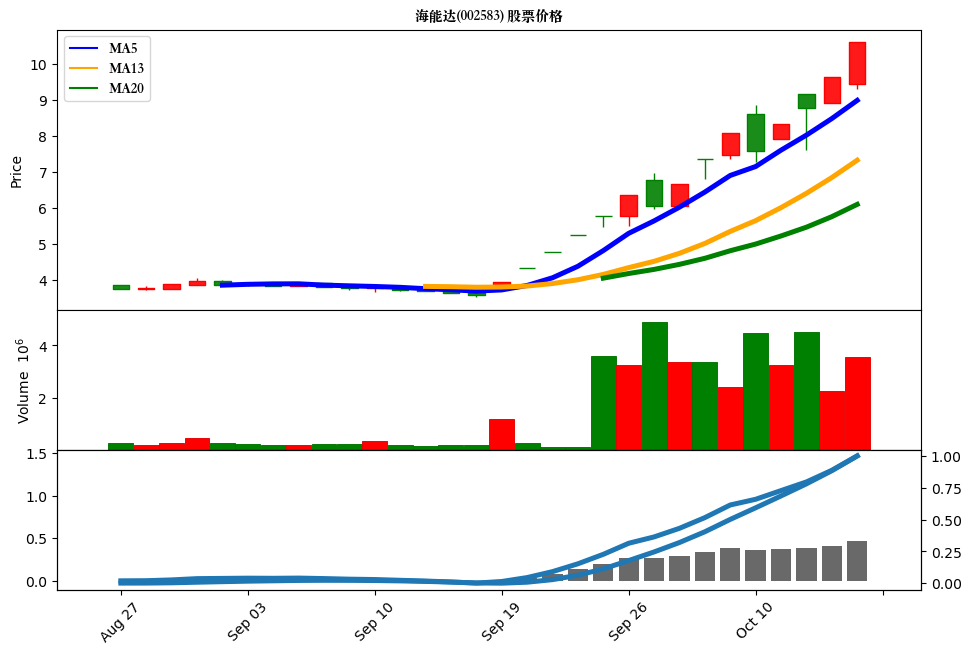

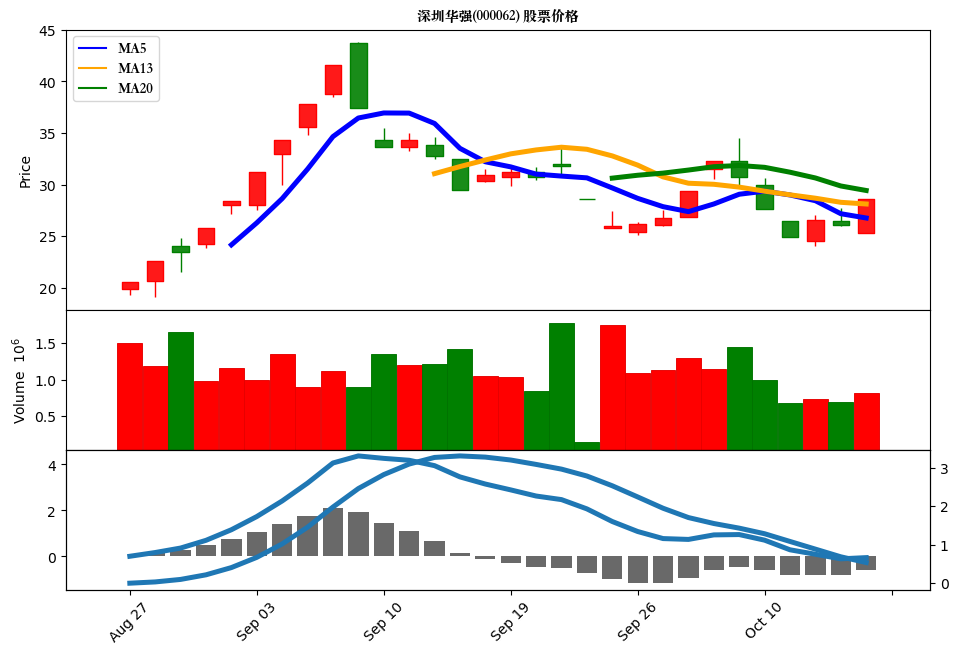

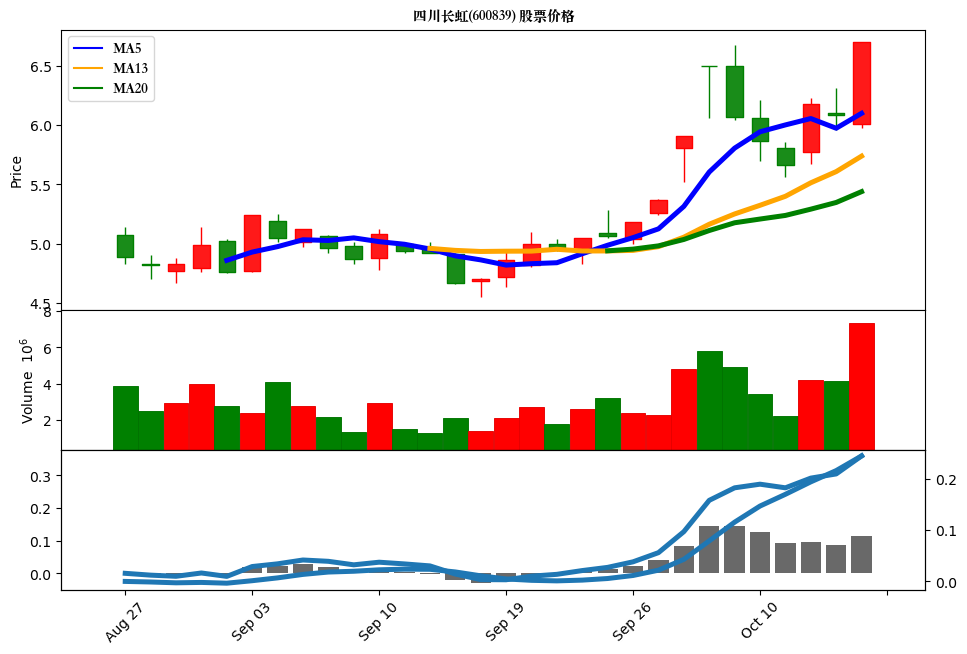

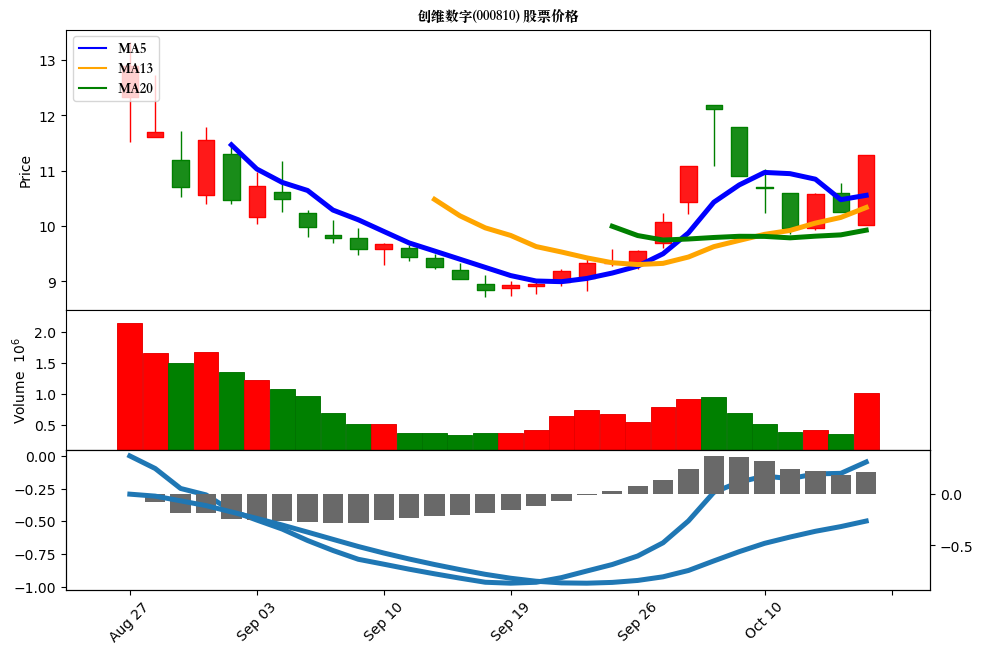

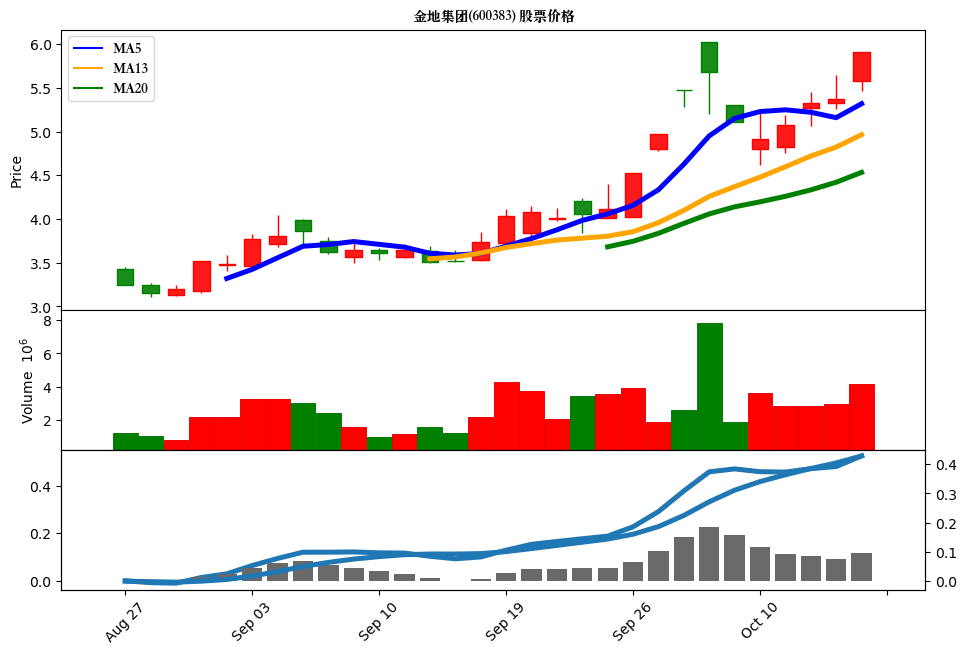

In [41]:
# 设置日期范围
end_date = datetime.now().strftime('%Y%m%d')
start_date = (datetime.now() - timedelta(days=50)).strftime('%Y%m%d')

# 为每只股票绘制图表
for _, stock in sorted_stocks.iterrows():
    plot_stock(stock['代码'], stock['名称'], start_date, end_date, save_image=True)
    plt.show()